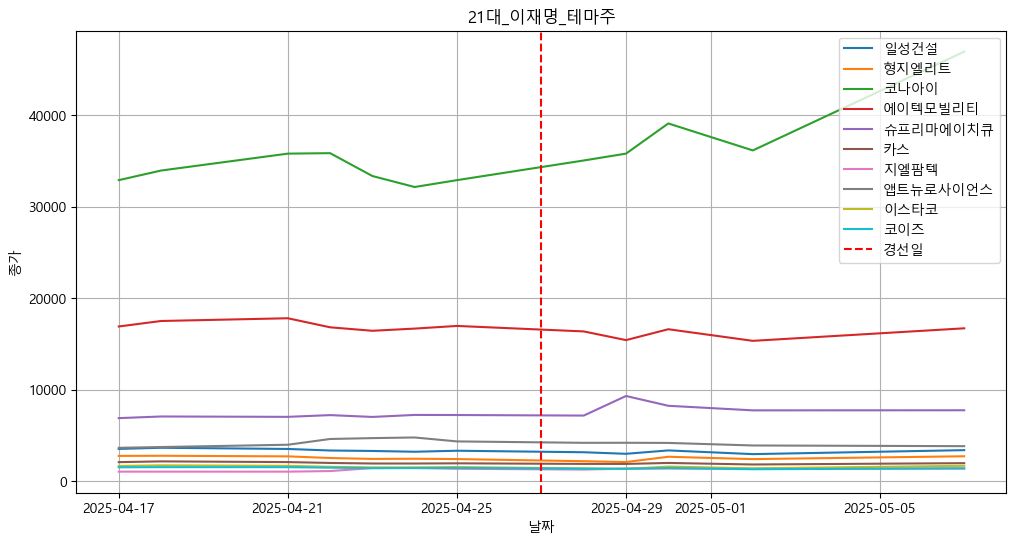

In [6]:
import FinanceDataReader as fdr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl
warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')  
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.dates as mdates

start_date = '2025-04-17' #경선확정일 - 10
end_date = '2025-05-07' #경선확정일 + 10

#테마주2  테마를 추가하고싶으면 아래에 이어서 적으시면됩니다.# thema2 = fdr.DataReader('015260', start=start_date, end=end_date)
#(1) 이 밑으로 계속 추가한 후 plt 부분에 같이 추가하시면 같이 시각화 가능
thema1 = fdr.DataReader('013360', start=start_date, end=end_date) #테마주1
thema2 = fdr.DataReader('093240', start=start_date, end=end_date)
thema3 = fdr.DataReader('052400', start=start_date, end=end_date)
thema4 = fdr.DataReader('224110', start=start_date, end=end_date)
thema5 = fdr.DataReader('094840', start=start_date, end=end_date)
thema6 = fdr.DataReader('016920', start=start_date, end=end_date)
thema7 = fdr.DataReader('204840', start=start_date, end=end_date)
thema8 = fdr.DataReader('217330', start=start_date, end=end_date)
thema9 = fdr.DataReader('015020', start=start_date, end=end_date)
thema10 = fdr.DataReader('121850', start=start_date, end=end_date)

thema= pd.DataFrame()
#(1)에 추가했을 경우 이 부분도 추가해주세요
thema['thema1'] = thema1['Close']
thema['thema2'] = thema2['Close']
thema['thema3'] = thema3['Close']
thema['thema4'] = thema4['Close']
thema['thema5'] = thema5['Close']
thema['thema6'] = thema6['Close']
thema['thema7'] = thema7['Close']
thema['thema8'] = thema8['Close']
thema['thema9'] = thema9['Close']
thema['thema10'] = thema10['Close']


#(1)에 추가했을 경우 이 부분도 추가해주세요
plt.figure(figsize=(12, 6))
plt.plot(thema.index, thema['thema1'], label='일성건설')
plt.plot(thema.index, thema['thema2'], label='형지엘리트')
plt.plot(thema.index, thema['thema3'], label='코나아이')
plt.plot(thema.index, thema['thema4'], label='에이텍모빌리티')
plt.plot(thema.index, thema['thema5'], label='슈프리마에이치큐')
plt.plot(thema.index, thema['thema6'], label='카스')
plt.plot(thema.index, thema['thema7'], label='지엘팜텍')
plt.plot(thema.index, thema['thema8'], label='앱트뉴로사이언스')
plt.plot(thema.index, thema['thema9'], label='이스타코')
plt.plot(thema.index, thema['thema10'], label='코이즈')


#경선 일에 빨간 점선 줄
plt.axvline(x=pd.to_datetime('2025-04-27'), color='red', linestyle='--', label='경선일') #경선일을 수정하려면 datatime변수 수정해주시면 됩니다.

plt.xlabel('날짜')
plt.ylabel('종가')
plt.title('21대_이재명_테마주')
plt.legend()
plt.grid(True)
plt.show()


label_dict = {
    'thema1': '일성건설',
    'thema2': '형지엘리트',
    'thema3': '코나아이',
    'thema4': '에이텍모빌리티',
    'thema5': '슈프리마에이치큐',
    'thema6': '카스',
    'thema7': '지엘팜텍',
    'thema8': '앱트뉴로사이언스',
    'thema9': '이스타코',
    'thema10' : '코이즈'
}


# 열 이름을 종목명으로 교체
thema_renamed = thema.rename(columns=label_dict)

# CSV로 저장 (index에 날짜 포함됨)
thema_renamed.to_csv('21대_이재명_테마주_일별종가_단기.csv', encoding='utf-8-sig')


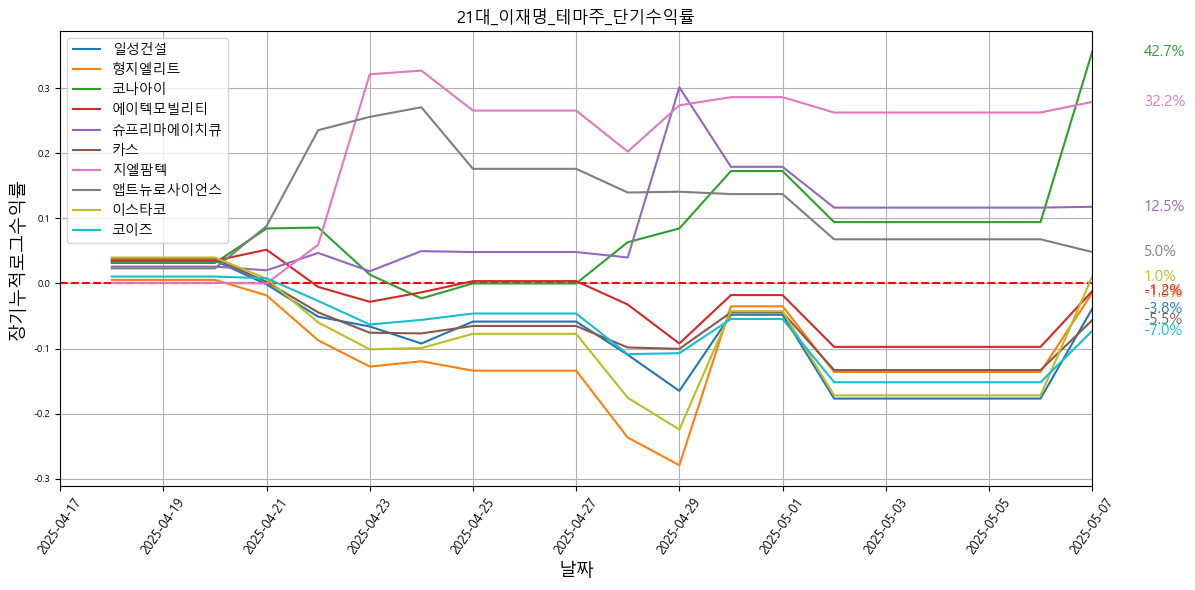

In [7]:
# 단기 수익률
# 누적 로그 수익률 계산
daily = thema.resample('d').last()
d_df = daily.pct_change()
daily_log_returns = d_df.apply(lambda x: np.log(1 + x)).cumsum() #로그 누적 수익률

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.axhline(y=0.0, color='red', linestyle='--')  # 수익률 0 기준선

# 종목 컬럼과 라벨
columns = ['thema1', 'thema2', 'thema3', 'thema4','thema5','thema6','thema7','thema8','thema9','thema10']
labels = ['일성건설','형지엘리트','코나아이','에이텍모빌리티','슈프리마에이치큐','카스','지엘팜텍','앱트뉴로사이언스','이스타코','코이즈']  # 이 부분 수정해주세요.
colors = plt.cm.tab10.colors

for i, (col, label) in enumerate(zip(columns, labels)):
    plt.plot(daily_log_returns.index, daily_log_returns[col], label=label, color=colors[i % 10])

    last_date = daily_log_returns.index[-1]
    log_return = daily_log_returns[col].iloc[-1]
    normal_return = np.exp(log_return) - 1  # 로그 수익률을 보기 쉽게 다시 일반수익률로 

    plt.text(last_date + pd.Timedelta(days=1),  
             log_return,
             f'{normal_return * 100:.1f}%',   
             fontsize=11,
             va='center',
             ha='left',
             color=colors[i % 10])
    
plt.xlim(daily_log_returns.index[0], daily_log_returns.index[-1]) 

plt.xticks(fontsize=9, rotation=55)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) #몇 일 간격으로 y축에 날짜가 나오게 할지 , 장기의 경우 8일 정도로 하면 좋을듯 합니다.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.yticks(fontsize=7)

plt.xlabel('날짜', fontsize=13)
plt.ylabel('장기누적로그수익률', fontsize=13)
plt.title('21대_이재명_테마주_단기수익률')
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

label_dict = {
    'thema1': '일성건설',
    'thema2': '형지엘리트',
    'thema3': '코나아이',
    'thema4': '에이텍모빌리티',
    'thema5': '슈프리마에이치큐',
    'thema6': '카스',
    'thema7': '지엘팜텍',
    'thema8': '앱트뉴로사이언스',
    'thema9': '이스타코',
    'thema10' : '코이즈'
}


# 열 이름을 종목명으로 바꿔 저장
daily_log_returns_named = daily_log_returns.rename(columns=label_dict)

# 누적 로그 수익률 → 일반 수익률로 변환
daily_normal_returns = np.exp(daily_log_returns_named) - 1

# 퍼센트 단위로 변환
daily_normal_returns_percent = daily_normal_returns * 100

# 저장
daily_normal_returns_percent.to_csv('21대_이재명_테마주_단기수익률.csv', encoding='utf-8-sig')